In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
aal = pd.read_csv("AAL.csv")
# dis = pd.read_csv("DIS.csv")
# pep = pd.read_csv("PEP.csv")

In [3]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day
0,2012-01-04,4.798554,4.883400,4.685425,4.741990,5268700,0.0,0,0.986207,2.470429,...,0.275909,5.818422,0.141411,0.339275,7.154691,4.826837,5.090804,4.657143,4.713707,10.011914
1,2012-01-05,4.855118,5.166223,4.779699,5.156795,8216100,0.0,0,-1.757827,2.075238,...,0.274442,5.321958,0.197976,0.338714,6.568296,4.741990,4.892828,4.562870,4.873973,10.464431
2,2012-01-06,5.128513,5.345344,5.090804,5.279352,8323000,0.0,0,8.747497,3.754203,...,0.279680,5.297619,0.386524,0.337928,6.400936,5.156795,4.930539,4.826837,5.043666,10.596415
3,2012-01-09,5.241642,5.467901,5.232215,5.392481,8029900,0.0,0,2.376606,3.793513,...,0.280099,5.194250,0.254540,0.338078,6.269426,5.279352,4.779699,4.949393,4.911683,10.747252
4,2012-01-10,5.477328,5.477328,5.288780,5.392481,6086500,0.0,0,2.142860,3.845516,...,0.276328,5.124320,0.235685,0.337891,6.265957,5.392481,4.826837,5.269925,5.024812,10.813245


In [4]:
aal['Hl_pct'] = 100*(aal['High'].shift(1)-aal['Low'].shift(1))/aal['Close'].shift(1)
#aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day,Hl_pct
0,2012-01-04,4.741990,5268700,0.0,0,0.986207,2.470429,4.171429,4.037707,1.547398,...,5.818422,0.141411,0.339275,7.154691,4.826837,5.090804,4.657143,4.713707,10.011914,NaN
1,2012-01-05,5.156795,8216100,0.0,0,-1.757827,2.075238,4.165293,4.038883,0.018792,...,5.321958,0.197976,0.338714,6.568296,4.741990,4.892828,4.562870,4.873973,10.464431,4.174951
2,2012-01-06,5.279352,8323000,0.0,0,8.747497,3.754203,4.357154,4.067311,0.294372,...,5.297619,0.386524,0.337928,6.400936,5.156795,4.930539,4.826837,5.043666,10.596415,7.495427
3,2012-01-09,5.392481,8029900,0.0,0,2.376606,3.793513,4.312651,4.069512,-0.253696,...,5.194250,0.254540,0.338078,6.269426,5.279352,4.779699,4.949393,4.911683,10.747252,4.821428
4,2012-01-10,5.392481,6086500,0.0,0,2.142860,3.845516,4.276019,4.070904,0.226160,...,5.124320,0.235685,0.337891,6.265957,5.392481,4.826837,5.269925,5.024812,10.813245,4.370630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2021-07-26,22.080000,31508800,0.0,0,0.189040,3.955102,2.468601,3.385305,1.014545,...,3.422906,0.670000,0.817302,3.701547,21.200001,18.969999,22.200001,22.040001,11.390000,3.160378
2405,2021-07-27,21.459999,30301300,0.0,0,4.150939,4.138321,2.539443,3.386666,0.238220,...,3.550791,1.170000,0.820040,3.821248,22.080000,20.559999,22.350000,21.760000,11.390000,5.298913
2406,2021-07-28,21.629999,20077400,0.0,0,-2.807975,4.012895,2.573219,3.392335,-0.471244,...,3.576308,1.049999,0.821786,3.799287,21.459999,21.400000,22.219999,21.700001,11.770000,4.892821
2407,2021-07-29,21.170000,19391300,0.0,0,0.792172,3.936669,2.559795,3.387068,-0.018626,...,3.639321,0.560001,0.821468,3.880341,21.629999,21.160000,21.389999,21.299999,11.400000,2.589003


In [5]:
aal1 = aal1.set_index("Date")
aal1.index = pd.to_datetime(aal1.index)

In [69]:
print(len(aal1.columns))
aal1.dropna(inplace=True)
aal1 = aal1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def get_VIF(df, target):
    X = add_constant(df.loc[:, df.columns != target])
    res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
    return res
target = 'Close'
g_all=get_VIF(aal1, target).to_frame()
g_all
g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
g.columns = ['VIF']
g= g[g['VIF']<100]
g.reset_index
c=list(g.index.values)
#aal1=aal1[c]
#c.remove('const')
c.append('Close')
aal1 = aal1[c]
print(len(aal1.columns))
g

73


C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


39


,VIF
Volume,5.257255
Dividends,1.021191
daily_returns,3.413068
std_10,10.079842
std_45,31.187553
market_daily_returns,1.378486
beta,4.792816
ER_10,48.113934
ROC_10,8.460415
RSI_10,19.208203


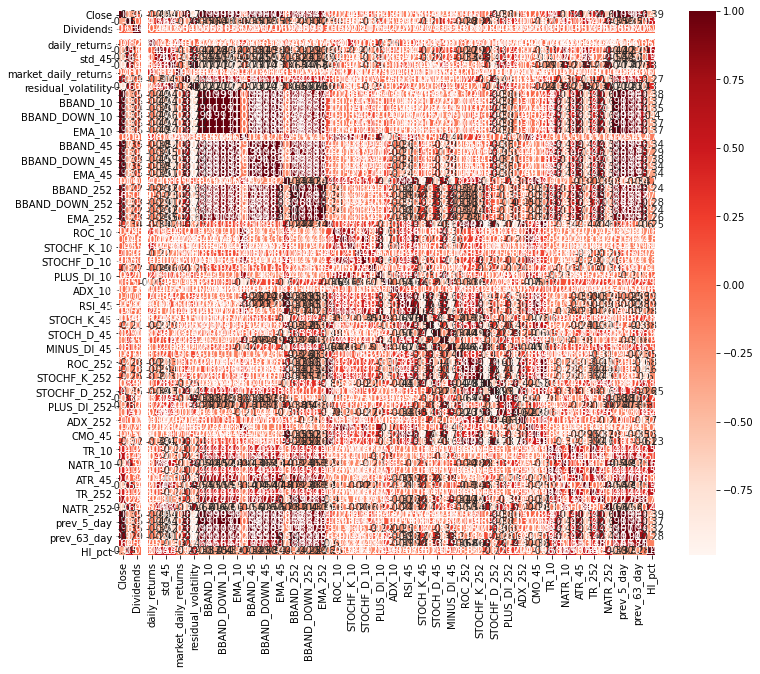

In [6]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
aal1

,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,beta,...,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day,Hl_pct
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,4.741990,5268700,0.0,0,0.986207,2.470429,4.171429,4.037707,1.547398,0.685455,...,5.818422,0.141411,0.339275,7.154691,4.826837,5.090804,4.657143,4.713707,10.011914,NaN
2012-01-05,5.156795,8216100,0.0,0,-1.757827,2.075238,4.165293,4.038883,0.018792,0.685491,...,5.321958,0.197976,0.338714,6.568296,4.741990,4.892828,4.562870,4.873973,10.464431,4.174951
2012-01-06,5.279352,8323000,0.0,0,8.747497,3.754203,4.357154,4.067311,0.294372,0.686080,...,5.297619,0.386524,0.337928,6.400936,5.156795,4.930539,4.826837,5.043666,10.596415,7.495427
2012-01-09,5.392481,8029900,0.0,0,2.376606,3.793513,4.312651,4.069512,-0.253696,0.685721,...,5.194250,0.254540,0.338078,6.269426,5.279352,4.779699,4.949393,4.911683,10.747252,4.821428
2012-01-10,5.392481,6086500,0.0,0,2.142860,3.845516,4.276019,4.070904,0.226160,0.686407,...,5.124320,0.235685,0.337891,6.265957,5.392481,4.826837,5.269925,5.024812,10.813245,4.370630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,22.080000,31508800,0.0,0,0.189040,3.955102,2.468601,3.385305,1.014545,1.134543,...,3.422906,0.670000,0.817302,3.701547,21.200001,18.969999,22.200001,22.040001,11.390000,3.160378
2021-07-27,21.459999,30301300,0.0,0,4.150939,4.138321,2.539443,3.386666,0.238220,1.129150,...,3.550791,1.170000,0.820040,3.821248,22.080000,20.559999,22.350000,21.760000,11.390000,5.298913
2021-07-28,21.629999,20077400,0.0,0,-2.807975,4.012895,2.573219,3.392335,-0.471244,1.139389,...,3.576308,1.049999,0.821786,3.799287,21.459999,21.400000,22.219999,21.700001,11.770000,4.892821


In [8]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [9]:
aal_df = aal1[rel_feat["sel_col"]]
# aal_df['Date']=aal1['Date']

In [10]:
print(len(aal1.columns), len(rel_feat))

75 42


In [75]:
#aal_df = aal1.copy()

In [76]:
#aal_df=aal_df.drop(['Typical Price'], axis=1)

In [77]:
aal_close_px = aal_df['Close']

In [78]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


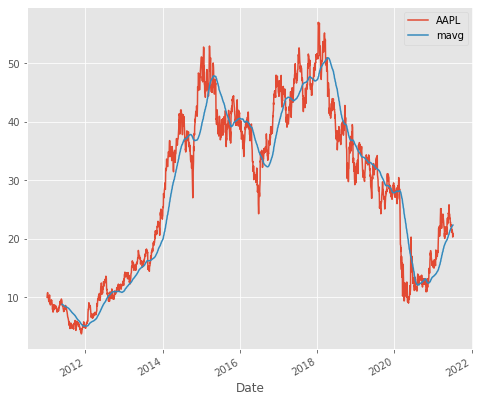

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

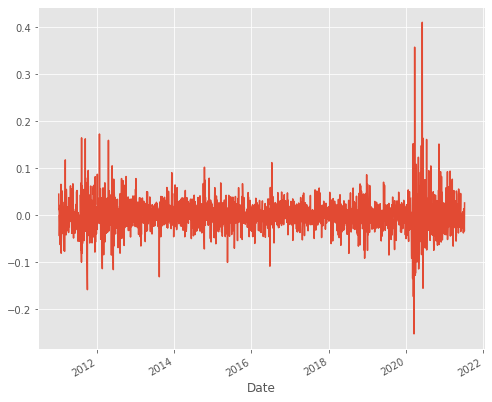

In [80]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [105]:
aal_df['prev_day'] = aal_df['Close'].shift(1)

In [11]:
aal_df = aal_df.iloc[1:]

In [107]:
# aal_df = aal_df.set_index("Date")

In [108]:
# aal_df = aal_df.set_index("Date")
# aal_df.index = pd.to_datetime(aal_df.index)
# aal_df.index[0]

In [109]:
# print(len(aal_df.columns))
# aal_df.fillna(value=-99999, inplace=True)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# def get_VIF(df, target):
#     X = add_constant(df.loc[:, df.columns != target])
#     res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
#     return res
# target = 'Close'
# g_all=get_VIF(aal_df, target).to_frame()
# g_all
# g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
# g.reset_index
# c=list(g.index.values)
# #aal_df=aal_df[c]
# c.remove('const')
# c.append('Close')
# aal_df = aal_df[c]
# print(len(aal_df.columns))
# g

In [110]:
# g_all

In [111]:
# aal = aal[['Volume', 'std_45', 'PLUS_DI_252', 'std_252', 'prev_day',
#        'residual_volatility', 'MINUS_DI_252',"Close"]]
# aal_df = aal.copy()

In [12]:
# training test split
key = pd.Timestamp(2017, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [13]:
# aal_df = aal_df.iloc[1:,:]
#aal_df.drop(['Open', 'High',"Low"], axis=1, inplace = True)
aal_df

,Close,Volume,std_10,std_45,std_252,beta,residual_volatility,Typical Price,BBAND_10,BBAND_UP_10,...,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day,Hl_pct
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-05,5.156795,8216100,2.075238,4.165293,4.038883,0.685491,3.623910,4.770272,5.097403,5.714355,...,5.321958,0.197976,0.338714,6.568296,4.741990,4.892828,4.562870,4.873973,10.464431,4.174951
2012-01-06,5.279352,8323000,3.754203,4.357154,4.067311,0.686080,3.655449,5.034239,5.053094,5.564226,...,5.297619,0.386524,0.337928,6.400936,5.156795,4.930539,4.826837,5.043666,10.596415,7.495427
2012-01-09,5.392481,8029900,3.793513,4.312651,4.069512,0.685721,3.658093,5.238500,5.037068,5.502327,...,5.194250,0.254540,0.338078,6.269426,5.279352,4.779699,4.949393,4.911683,10.747252,4.821428
2012-01-10,5.392481,6086500,3.845516,4.276019,4.070904,0.686407,3.659196,5.364199,5.038953,5.510386,...,5.124320,0.235685,0.337891,6.265957,5.392481,4.826837,5.269925,5.024812,10.813245,4.370630
2012-01-11,5.571603,6434400,3.809994,4.177623,4.070603,0.684785,3.658703,5.386196,5.048381,5.545904,...,4.835494,0.188548,0.337479,6.057126,5.392481,4.741990,5.034239,5.505610,10.341875,3.496500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,22.080000,31508800,3.955102,2.468601,3.385305,1.134543,3.245386,21.303334,20.502000,21.984664,...,3.422906,0.670000,0.817302,3.701547,21.200001,18.969999,22.200001,22.040001,11.390000,3.160378
2021-07-27,21.459999,30301300,4.138321,2.539443,3.386666,1.129150,3.248171,21.710000,20.626000,22.410905,...,3.550791,1.170000,0.820040,3.821248,22.080000,20.559999,22.350000,21.760000,11.390000,5.298913
2021-07-28,21.629999,20077400,4.012895,2.573219,3.392335,1.139389,3.252817,21.576667,20.770000,22.569901,...,3.576308,1.049999,0.821786,3.799287,21.459999,21.400000,22.219999,21.700001,11.770000,4.892821


In [114]:
 #!pip install -U statsmodels
#!pip install -U pandas


In [115]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [116]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [14]:
# # # model generation
xtrain.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

<ipython-input-14-57b427f81183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain.dropna(inplace=True)


In [15]:
cols = xtrain.columns
cols

Index(['std_45', 'BBAND_UP_45', 'BBAND_UP_10', 'prev_day', 'std_252',
       'prev_63_day', 'std_10', 'BBAND_45', 'EMA_45', 'prev_5_day', 'EMA_10',
       'TR_45', 'BBAND_DOWN_45', 'EMA_252', 'ATR_10', 'TR_252', 'SMA_10',
       'BBAND_252', 'SMA_252', 'TR_10', 'BBAND_DOWN_252', 'beta',
       'BBAND_UP_252', 'Hl_pct', 'BBAND_10', 'NATR_45', 'ATR_252', 'Volume',
       'SMA_45', 'ATR_45', 'NATR_10', 'STOCH_D_252', 'PLUS_DI_252',
       'BBAND_DOWN_10', 'STOCHF_D_252', 'residual_volatility', 'ER_252',
       'prev_22_day', 'Typical Price', 'prev_252_day', 'NATR_252'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [17]:
xtrain

array([[ 2.30328579, -1.90334712, -1.89731076, ..., -1.93295333,
        -0.99718268,  4.69776011],
       [ 2.56296205, -1.90452781, -1.90763973, ..., -1.91394662,
        -0.98819493,  4.47410135],
       [ 2.50273021, -1.90416853, -1.9118984 , ..., -1.89923901,
        -0.97792326,  4.29835126],
       ...,
       [-1.23290378,  1.13704962,  1.30206176, ...,  1.42906712,
         1.48898705, -1.19675376],
       [-1.26034431,  1.14466305,  1.31072692, ...,  1.40427042,
         1.42712987, -1.19957926],
       [-1.29476895,  1.14814918,  1.30670003, ...,  1.40356813,
         1.39949232, -1.18392314]])

In [18]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
from sklearn import linear_model
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)
clflass = linear_model.Lasso(alpha=0.1)
clflass.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [19]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=2)

In [20]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)
clflass.score(xtest, ytest)

The linear regression confidence is  0.9876697503347845
The quadratic regression 2 confidence is  0.9802603083764401
The quadratic regression 3 confidence is  0.9245274298571553
The knn regression confidence is  0.8259160138274256


0.9880845377636522

In [21]:
forecast_set = clfreg.predict(xtest)
Forecast = pd.DataFrame()
Forecast['Forecast'] = np.nan
Forecast['Date']=aal_df.index
Forecast=Forecast.set_index('Date')

In [22]:
forecast_set
Forecast['Forecast']

Date
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
2012-01-10   NaN
2012-01-11   NaN
              ..
2021-07-26   NaN
2021-07-27   NaN
2021-07-28   NaN
2021-07-29   NaN
2021-07-30   NaN
Name: Forecast, Length: 2408, dtype: float64

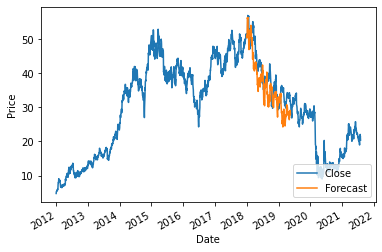

KeyError: 'Forecast'

In [23]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = key
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    Forecast.loc[next_date] = [i]
aal1['Close'].plot()
Forecast['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [24]:
print(next_unix)

2019-05-17 00:00:00


In [25]:
print(clfreg.coef_)

[ 6.91797029e-02 -1.74211579e-01  1.13477279e-01  1.28948595e+01
 -2.55608379e+00 -2.31620066e-01  8.66674539e-02 -5.72933536e-01
  6.72306319e+00  2.01127526e-01 -3.33572126e+00 -5.40893232e-02
 -1.03425625e+00 -3.70166126e+00  4.94662464e-01 -5.40893232e-02
  3.38176531e-02  6.31896373e-01  6.31896373e-01 -5.40893232e-02
  5.78902917e-03  3.68563054e-01  1.07832251e+00  1.32836134e-01
  3.38176531e-02 -2.63398017e-01 -5.61358529e-01 -2.15205535e-02
 -5.72933536e-01  6.83454297e-01 -4.49575990e-01  2.13032573e+00
 -6.44706348e-01 -5.33587840e-02  9.73703256e-01  2.46446875e+00
 -3.15806021e-01 -2.11419438e-01  4.68785820e-01 -5.06564397e-01
 -6.25935543e-01]


In [26]:
print(clfreg.intercept_)

31.647200077515052


In [27]:
xtrain.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [28]:
coeff = dict(zip(cols, clfreg.coef_))


In [29]:

coeff

{'std_45': 0.06917970290376144,
 'BBAND_UP_45': -0.17421157922751865,
 'BBAND_UP_10': 0.11347727855355079,
 'prev_day': 12.894859479602221,
 'std_252': -2.5560837858857237,
 'prev_63_day': -0.23162006585808861,
 'std_10': 0.0866674538691405,
 'BBAND_45': -0.5729335357554184,
 'EMA_45': 6.723063193207168,
 'prev_5_day': 0.2011275262097911,
 'EMA_10': -3.3357212564360035,
 'TR_45': -0.054089323224773674,
 'BBAND_DOWN_45': -1.0342562529943125,
 'EMA_252': -3.7016612597774046,
 'ATR_10': 0.494662463724385,
 'TR_252': -0.05408932322483955,
 'SMA_10': 0.03381765311953482,
 'BBAND_252': 0.6318963725822702,
 'SMA_252': 0.6318963725822617,
 'TR_10': -0.05408932322471328,
 'BBAND_DOWN_252': 0.005789029167921792,
 'beta': 0.36856305382827054,
 'BBAND_UP_252': 1.0783225116673065,
 'Hl_pct': 0.13283613449190615,
 'BBAND_10': 0.03381765311952683,
 'NATR_45': -0.26339801695772236,
 'ATR_252': -0.561358529122956,
 'Volume': -0.021520553514998212,
 'SMA_45': -0.5729335357555657,
 'ATR_45': 0.6834542965

In [31]:
factors = dict(sorted(coeff.items(), key=lambda item: abs(item[1]), reverse = True))
factors_dict = {"features":factors.keys(), "regression coeff":factors.values()}
factors_df = pd.DataFrame(factors_dict)

In [32]:
factors_df

,features,regression coeff
0,prev_day,12.894859
1,EMA_45,6.723063
2,EMA_252,-3.701661
3,EMA_10,-3.335721
4,std_252,-2.556084
5,residual_volatility,2.464469
6,STOCH_D_252,2.130326
7,BBAND_UP_252,1.078323
8,BBAND_DOWN_45,-1.034256
9,STOCHF_D_252,0.973703


In [ ]:
xtrain.shape, ytrain.shape

In [ ]:
clfreg = LinearRegression()
clfreg.fit(xtrain, ytrain)

In [ ]:
clfreg.score(xtrain, ytrain)

In [ ]:
clfreg.score(xtest, ytest)

In [ ]:
ytrain